目录
+ K-Means 聚类
    + 画类群图
    + 计算类中心
    + 返回聚类标签
    + 返回每个点距离各类中心的位置
+ 确定类中心的个数
+ 聚类模型的评估
    + 互信息做评估
    + Inertia 做评估
+ 适合于大量数据的小批量K均值 （MiniBatch KMeans）
+ 利用k均值进行图像处理
+ 度量样本之间的距离
+ 混合高斯模型  
+ 用k-means进行异常值探测
+ 利用K-NN做回归

In [1]:
import numpy as np
import  pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import scipy
import sklearn

In [2]:
%matplotlib inline

# K-Means 聚类
+ 画类群图
+ 计算类中心
+ 返回聚类标签
+ 返回每个点距离各类中心的位置

In [3]:
from sklearn.cluster import KMeans

In [4]:
# 生成聚类数据
from sklearn.datasets import make_blobs
blobs, classes = make_blobs(500, centers=3)

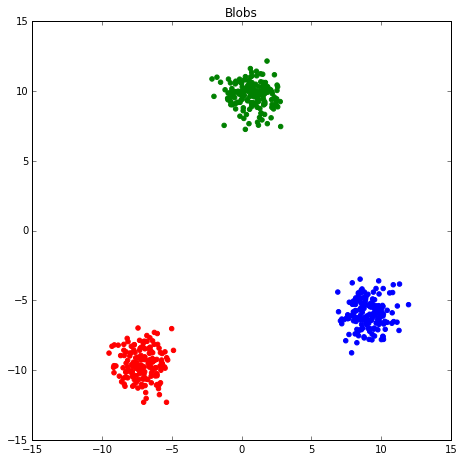

In [5]:
rgb = np.array(['r', 'g', 'b'])
f, ax = plt.subplots(figsize=(7.5, 7.5))
ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[classes])
ax.set_title("Blobs");

In [6]:
kmean = KMeans(n_clusters=3)
kmean.fit(blobs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
kmean.cluster_centers_    # 返回3个类中心的坐标

array([[ 0.70560763,  9.68952629],
       [-7.08118476, -9.55299955],
       [ 9.08738024, -5.9467366 ]])

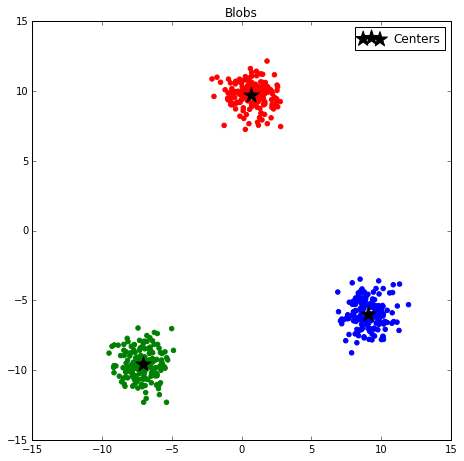

In [8]:
# 对聚类以后的数据做图，并标记类中心的位置
f, ax = plt.subplots(figsize=(7.5, 7.5))
ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[kmean.labels_])
ax.scatter(kmean.cluster_centers_[:, 0],kmean.cluster_centers_[:, 1], marker='*', s=250,color='black', label='Centers')
ax.set_title("Blobs")
ax.legend(loc='best')

In [9]:
kmean.labels_[:5]    # 聚类以后每个类的标签，与原始的标签可能不一样

array([2, 0, 2, 1, 2])

In [10]:
classes[:5]     # 原始的类别的标签

array([2, 1, 2, 0, 2])

In [11]:
kmean.transform(blobs)[:5]   # 返回每个点分别到3个类中心的距离

array([[ 17.07409591,  16.2886825 ,   0.67691195],
       [  0.38312055,  20.98439533,  17.64912909],
       [ 18.49479312,  15.95383903,   1.13723389],
       [ 22.18762978,   2.16035536,  18.72000808],
       [ 18.41466303,  17.56108086,   1.06917217]])

# 确定类中心的个数

In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [13]:
# 准备聚类数据集
from sklearn.datasets import make_blobs
import numpy as np
blobs, classes = make_blobs(500, centers=3)

In [14]:
# 聚类
kmean = KMeans(n_clusters=3)
kmean.fit(blobs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
# 计算聚类效果
metrics.silhouette_score(blobs, kmean.labels_)  # silhouette_score方法，计算所有样本点轮廓系数的均值

0.65686036202146258

### 介绍 silhouette距离（中文称为 轮廓系数）  
- 该距离衡量了所分的类与数据点的匹配程度：距离其他组越远，距离自己租越近，该分数越高  
- 在分类基本正确的条件下，所有的距离都偏向于1  
- 所以应该服从左偏分布  

In [16]:
from sklearn import metrics

silhouette_samples = metrics.silhouette_samples(blobs,kmean.labels_)     # 计算轮廓系数
np.column_stack((classes[:5], silhouette_samples[:5]))

array([[ 1.        ,  0.70777226],
       [ 0.        ,  0.86328794],
       [ 1.        ,  0.35218225],
       [ 1.        ,  0.50101408],
       [ 1.        ,  0.66005949]])

(array([   6.,    4.,   10.,   16.,   33.,   46.,   91.,  128.,   19.,  147.]),
 array([ 0.02638602,  0.11351942,  0.20065281,  0.28778621,  0.37491961,
         0.46205301,  0.5491864 ,  0.6363198 ,  0.7234532 ,  0.81058659,
         0.89771999]),
 <a list of 10 Patch objects>)

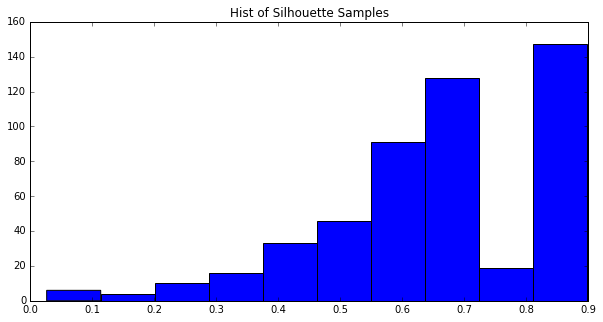

In [17]:
# 画silhouette距离的分布
f, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Hist of Silhouette Samples")
ax.hist(silhouette_samples)

In [18]:
silhouette_samples.mean()   # 用所有样本点的轮廓系数均值，来衡量聚类的整体效果

0.65686036202146258

#### 确定最优的类别数目

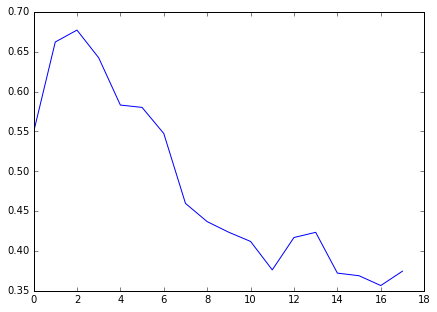

In [19]:
# 生成聚类数据
blobs, classes = make_blobs(500, centers=10)

sillhouette_avgs = []

# 利用ilhouette_score选择最合适的k
for k in range(2, 20):
    kmean = KMeans(n_clusters=k).fit(blobs)
    sillhouette_avgs.append(metrics.silhouette_score(blobs,kmean.labels_))
    
# 画出 sillhouette_avgs 的图，选择最佳K   
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(sillhouette_avgs)   # 从图中判断出的最优的聚类中心个数，与真实情况下的10个不同，这反映了聚类问题的困境，我们很难得到准确的类别个数

# 聚类模型的评估

In [20]:
# 准备聚类数据
from sklearn import datasets
from sklearn import cluster
blobs, ground_truth = datasets.make_blobs(1000, centers=3,cluster_std=1.75)

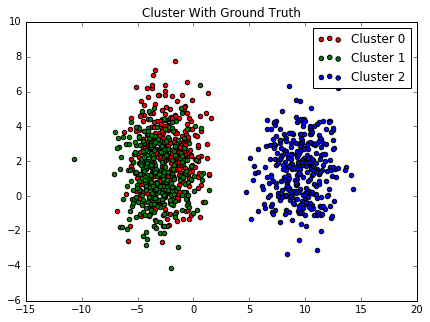

In [21]:
# 数据分类情况预览
f, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']
for i in range(3):
    p = blobs[ground_truth == i]
    ax.scatter(p[:,0], p[:,1], c=colors[i],
    label="Cluster {}".format(i))
ax.set_title("Cluster With Ground Truth")
ax.legend()

In [22]:
# 聚类
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(blobs)
kmeans.cluster_centers_  # 返回类中心

array([[-3.54740282,  0.50987849],
       [ 9.53785455,  1.55272024],
       [-1.96842995,  3.08622595]])

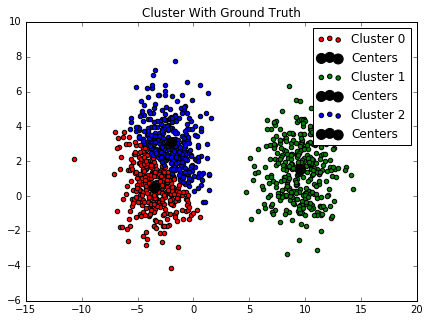

In [23]:
# 聚类情况
f, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']
for i in range(3):
    p = blobs[kmeans.labels_ == i]
    ax.scatter(p[:,0], p[:,1], c=colors[i],label="Cluster {}".format(i))
    ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=100, color='black',label='Centers')
    ax.set_title("Cluster With Ground Truth")
    ax.legend()
    

In [24]:
# 查看聚类标签与原始数据的标签是否一致
for i in range(3):
    print (kmeans.labels_ == ground_truth)[ground_truth == i].astype(int).mean()

0.320359281437
0.0
0.0


In [25]:
# 该步骤为备选步骤，若kmeans.labels_ == ground_truth，则上一步的和都接近于1，不需要再进行此步骤
# 若kmeans.labels_ 与 ground_truth 的标签标的不一致，则上一步的和接近于0，要用此步骤进行调换标签

new_ground_truth = ground_truth.copy()
new_ground_truth[ground_truth == 0] = 2
new_ground_truth[ground_truth == 2] = 0


# 调换完标签以后再做验证，保证标签一致
for i in range(3):
    print (kmeans.labels_ == new_ground_truth)[ground_truth == i].astype(int).mean()

0.679640718563
0.0
0.0


#### 互信息做评估

In [26]:
from sklearn import metrics

In [27]:
metrics.mutual_info_score(ground_truth, kmeans.labels_)   # 计算互信息，不用考虑真实标签与聚类标签是否对应

0.67858273103770705

In [28]:
metrics.normalized_mutual_info_score(ground_truth, kmeans.labels_)   # 标准化互信息分数的指标，越接近，分数越高

0.61767824000577076

In [29]:
metrics.adjusted_mutual_info_score(ground_truth, kmeans.labels_) # 调整互信息，根据聚类的个数来调整互信息

0.61697402213354013

#### Inertia 做评估

In [30]:
kmeans.inertia_       # Inertia is the sum of the squared difference between each point and its assigned cluster，值越低越好，但并非是一个好的评判标准

4729.7586629616289

# 适合于大量数据的小批量K均值 （MiniBatch KMeans）
+ 小批量K均值计算量远小于k均值  
+ 牺牲一部分精度

In [31]:
from sklearn.cluster import KMeans, MiniBatchKMeans

In [32]:
# 构造分类数据集
from sklearn.datasets import make_blobs
blobs, labels = make_blobs(int(1e6), 3)

用k均值做聚类

In [33]:
kmeans = KMeans(n_clusters=3)
%time kmeans.fit(blobs)   # 拟合了k均值，并返回耗时

Wall time: 5.42 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
kmeans.cluster_centers_    # 因为blobs的数据是三维的

array([[-9.23666843, -6.05581192,  9.26475823],
       [ 6.7417649 ,  1.95304063, -3.22317449],
       [ 1.20472048, -4.5595491 ,  4.14695564]])

用小批量K均值做聚类

In [35]:
minibatch = MiniBatchKMeans(n_clusters=3)
%time minibatch.fit(blobs)   # 拟合了小批量k均值，并返回耗时，相比之下耗时短了很多

Wall time: 2.28 s


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [36]:
minibatch.cluster_centers_ 

array([[ 6.73443706,  1.94915601, -3.22345316],
       [-9.23621237, -6.05823897,  9.26231357],
       [ 1.20768631, -4.56336818,  4.15165297]])

两个算法的比较
1. 时间差距很大
2. 结果有差距

In [37]:
from sklearn.metrics import pairwise

In [38]:
# 计算2个方法的第一个类中心的距离
pairwise.pairwise_distances(kmeans.cluster_centers_[0],minibatch.cluster_centers_[0])

# 结果显示差距挺远的

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 21.79704443]])

In [39]:
# 利用矩阵同时计算3个类中心的距离
np.diag(pairwise.pairwise_distances(kmeans.cluster_centers_,minibatch.cluster_centers_))

array([  2.17970444e+01,   2.18028386e+01,   6.74139259e-03])

修改小批量k均值的参数

In [40]:
minibatch = MiniBatchKMeans(batch_size=len(blobs))    # 每个小批量的参数要合理设置，要不然适得其反哦，而且是否收敛到全局最优也不能保证
%time minibatch.fit(blobs)

Wall time: 30.4 s


MiniBatchKMeans(batch_size=1000000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

# 利用k均值进行图像处理

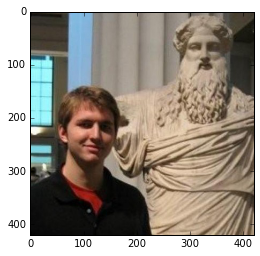

In [41]:
from scipy import ndimage
img = ndimage.imread("headshot.jpg")
plt.imshow(img)

In [42]:
img.shape  # 420*420个像素点，每个像素点有3个RGB值

(420L, 420L, 3L)

In [43]:
x, y, z = img.shape
long_img = img.reshape(x*y, z)  # 将3维数组转化为2维数组，一维代表像素点，另一维代表RGB值
long_img.shape

(176400L, 3L)

In [44]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=5)
k_means.fit(long_img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
centers = k_means.cluster_centers_     # 5个聚类中心
centers

array([[  86.94044067,   69.40864924,   54.49516902],
       [ 195.04913301,  172.72319692,  150.01973509],
       [  25.02854547,   20.72883374,   16.40737607],
       [ 150.02560721,  133.01129355,  116.16980731],
       [ 142.55088532,  206.10921728,  226.04658282]])

In [46]:
labels = k_means.labels_    # 每个样本点的标签
labels[:5]

array([0, 0, 0, 0, 0])

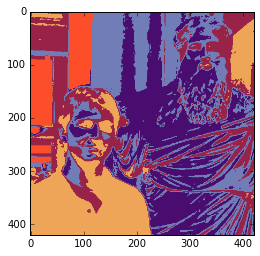

In [47]:
plt.imshow(centers[labels].reshape(x, y, z))   # 图像被模糊化，只有5种颜色

# 度量样本之间的距离

In [48]:
from sklearn.metrics import pairwise

In [49]:
from sklearn.datasets import make_blobs
points, labels = make_blobs()

In [50]:
# 计算两个样本之间的欧氏距离函数
def euclid_distances(x, y):
    return np.power(np.power(x - y, 2).sum(), .5)

In [51]:
euclid_distances(points[0], points[1])  # 计算第一个样本点和第二个样本点之间的距离，和下面pairwise的结果一致

5.0748162021258585

In [52]:
distances = pairwise.pairwise_distances(points)   # 默认的距离是RMSE,第ij个元素代表i样本和j样本的距离

In [53]:
np.diag(distances) [:5]   # 对角线元素都为0，表示自己和自己的距离

array([ 0.,  0.,  0.,  0.,  0.])

In [54]:
distances[0][:5]        # 第1个样本点与其他样本点的距离

array([  0.        ,   5.0748162 ,   0.22230671,  14.06582942,  13.784381  ])

In [55]:
ranks = np.argsort(distances[0])  # 按距离由近到远排列，返回的是原来所处的位置，即第49个样本距离最近，79就次之
ranks[:5]

array([ 0,  2, 54, 93, 92], dtype=int64)

In [56]:
points[ranks][:5]   # 得到排序后的样本点，从近到远

array([[-3.40424372, -6.24929855],
       [-3.42821952, -6.02828852],
       [-3.29378609, -6.53964621],
       [-3.09926713, -6.3107508 ],
       [-3.52232786, -6.82024104]])

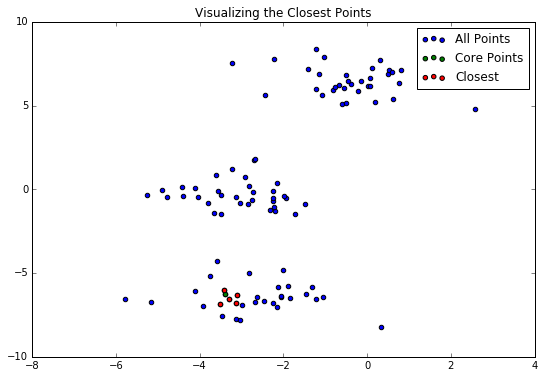

In [57]:
f, ax = plt.subplots(figsize=(9, 6))

five_closest = points[ranks][:6]

ax.set_title("Visualizing the Closest Points")
ax.scatter(points[:, 0], points[:, 1], label='All Points')
ax.scatter(points[0, 0], points[0, 1], c='g', label='Core Points')
ax.scatter(five_closest[1:, 0], five_closest[1:, 1], c='r', label='Closest')
ax.legend();

### 其他距离度量方式
+ cityblock
+ cosine
+ euclidean
+ l1
+ l2
+ manhattan
+ 其他SciPy中提供的距离度量方式

In [58]:
# cityblock
# If we were standing on a grid at the origin, and the lines were the streets, how far will we have to travel to get to point (5, 5)?
pairwise.pairwise_distances([[0, 0], [5, 5]], metric='cityblock')[0]

array([  0.,  10.])

In [59]:
X = np.random.binomial(1, .5, size=(2, 4)).astype(np.bool)
X

array([[ True, False,  True,  True],
       [ True,  True, False, False]], dtype=bool)

In [60]:
# 汉明距离
pairwise.pairwise_distances(X, metric='hamming')

array([[ 0.  ,  0.75],
       [ 0.75,  0.  ]])

# 混合高斯模型  
- 理论介绍  
-- 1维的情况  
-- 多维的情况  
- 操作  

#### 理论介绍  
1维的情况：两个组均值不同，方差相同

In [61]:
# 准备正态分布数据（两个组均值不同，方差相同）

import numpy as np
N = 1000

in_m = 72   # 均值
in_w = 66

s_m = 2   # 方差
s_w = s_m

m = np.random.normal(in_m, s_m, N)  # 生成正态分布
w = np.random.normal(in_w, s_w, N)

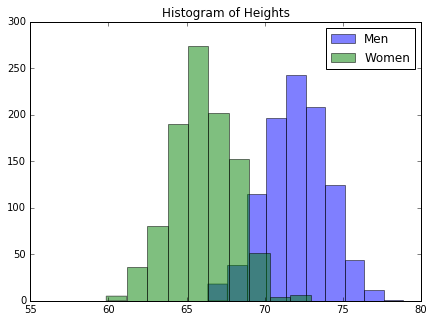

In [62]:
# 查看数据
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Histogram of Heights")
ax.hist(m, alpha=.5, label="Men");
ax.hist(w, alpha=.5, label="Women");
ax.legend()

In [63]:
# 构建训练集和测试集
random_sample = np.random.choice([True, False], size=m.size)

m_test = m[random_sample]
m_train = m[~random_sample]

w_test = w[random_sample]
w_train = w[~random_sample]

In [64]:
# 拟合分布
from scipy import stats

m_pdf = stats.norm(m_train.mean(), m_train.std())
w_pdf = stats.norm(w_train.mean(), w_train.std())

In [65]:
m_pdf.pdf(m[0])  # 样本点来自第一个分布的概率

0.1416916876423755

In [66]:
w_pdf.pdf(m[0])    # 样本点来自第二个分布的概率

0.01969722058958016

In [67]:
#  计算m的分类正确率
guesses_m = np.ones_like(m_test)   # 取出测试集中所有的m类，赋值为1

guesses_m[m_pdf.pdf(m_test) < w_pdf.pdf(m_test)] = 0   # 若为m的概率小于为n的概率则判别为n类，即将m判为n，属于错分，赋为0

guesses_m.mean()   # 求均值即为计算正确率

0.91683168316831687

In [68]:
#  计算n的分类正确率
guesses_w = np.ones_like(w_test)
guesses_w[m_pdf.pdf(w_test) > w_pdf.pdf(w_test)] = 0
guesses_w.mean()

0.94455445544554451

1维的情况：两个组均值不同，方差也不同

In [69]:
s_m = 1
s_w = 4

m = np.random.normal(in_m, s_m, N)
w = np.random.normal(in_w, s_w, N)

In [70]:
m_test = m[random_sample]
m_train = m[~random_sample]

w_test = w[random_sample]
w_train = w[~random_sample]

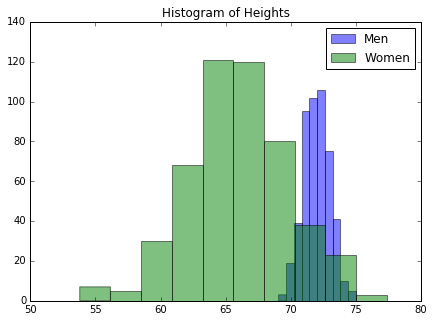

In [71]:
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Histogram of Heights")
ax.hist(m_train, alpha=.5, label="Men");
ax.hist(w_train, alpha=.5, label="Women");
ax.legend()

In [72]:
m_pdf = stats.norm(m_train.mean(), m_train.std())
w_pdf = stats.norm(w_train.mean(), w_train.std())

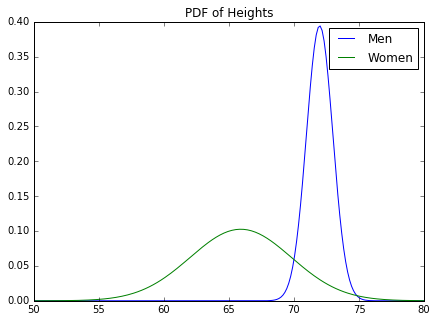

In [73]:
# 绘制拟合后的分布概率密度图
f, ax = plt.subplots(figsize=(7, 5))

ax.set_title("PDF of Heights")
ax.plot(np.linspace(50, 80, 200), m_pdf.pdf(np.linspace(50, 80, 200)), label='Men')
ax.plot(np.linspace(50, 80, 200), w_pdf.pdf(np.linspace(50, 80, 200)), label='Women')

ax.legend();

多维的情况

In [74]:
# 多维高斯分布
class_A = np.random.normal(0, 1, size=(100, 2))   # 2维，100个样本点
class_B = np.random.normal(4, 1.5, size=(100, 2))

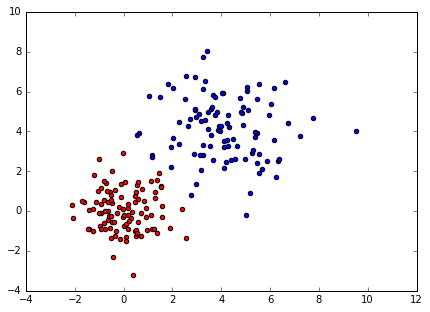

In [75]:
f, ax = plt.subplots(figsize=(7, 5))
ax.scatter(class_A[:,0], class_A[:,1], label='A', c='r')
ax.scatter(class_B[:,0], class_B[:,1], label='B')

#### 操作方法

In [76]:
from sklearn.mixture import GMM

In [77]:
gmm = GMM(n_components=2)   # 设置有2类
X = np.row_stack((class_A, class_B))   # 纵向拼接
y = np.hstack((np.ones(100), np.zeros(100)))
train = np.random.choice([True, False], 200)

C:\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [78]:
gmm.fit(X[train])

C:\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  tol=0.001, verbose=0)

In [79]:
# 预测
gmm.predict(X[~train])[:5]

C:\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


array([0, 0, 0, 0, 0], dtype=int64)

In [80]:
# 获取每个样本点属于不同类别的log probabilities
gmm.score_samples(X[~train][:1]) # 对于第一个样本来说，第1类的概率大于第0类，因此分到第1类，与上面的结果吻合

C:\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


(array([-4.39553671]), array([[  9.99573963e-01,   4.26036794e-04]]))

# 用k-means进行异常值探测

In [81]:
from sklearn.cluster import KMeans

In [82]:
# 准备数据，从该数据中找出距离类中心最远的点作为异常值点
from sklearn.datasets import make_blobs
X, labels = make_blobs(100, centers=1)   # 100个样本，1个类
import numpy as np

In [83]:
kmeans = KMeans(n_clusters=1)  # 必须设置为只有1个类别
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [84]:
kmeans.cluster_centers_ # 聚类中心

array([[ 1.56379235,  4.7073994 ]])

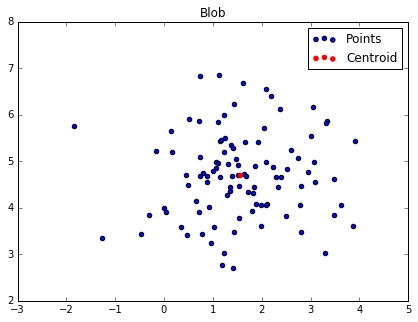

In [85]:
# 画出数据集，并标记类中心
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Blob")
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], label='Centroid',color='r')
ax.legend()

In [86]:
distances = kmeans.transform(X)   # 计算每个样本点与所有类中心的距离

In [87]:
# argsort返回向量中每个元素升序排名的位次（rank），用返回值做索引，可以起到升序排列的作用
# 索引[::-1]则变成降序，从而找出距离最远的5个样本点
# np.ravel方法将2维数组（矩阵）扁平化为1维数组（向量），默认按行排列

sorted_idx = np.argsort(distances.ravel())[::-1][:5]   # 获得距离最远的5个样本点的索引

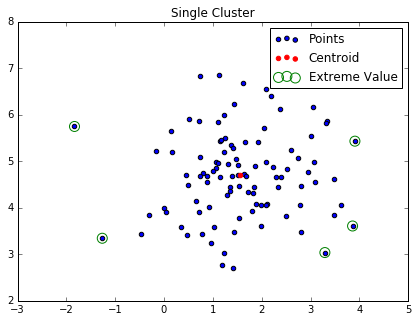

In [88]:
# 做含有异常值的图
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Single Cluster")
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1],label='Extreme Value', edgecolors='g',facecolors='none', s=100)
ax.legend(loc='best')

#### 删除异常值

In [89]:
new_X = np.delete(X, sorted_idx, axis=0)  # 删除异常值

In [90]:
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

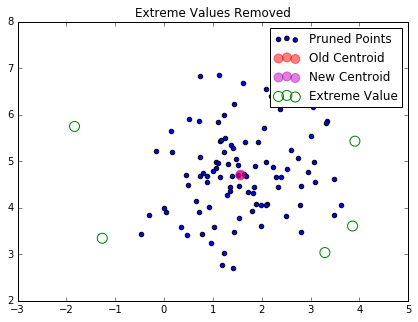

In [91]:
# 正常值、被删除的异常值、旧的类中心、新的类中心
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Extreme Values Removed")
ax.scatter(new_X[:, 0], new_X[:, 1], label='Pruned Points')
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], label='Old Centroid',color='r', s=80, alpha=.5)
ax.scatter(new_kmeans.cluster_centers_[:, 0],new_kmeans.cluster_centers_[:, 1], label='New Centroid',color='m', s=80, alpha=.5)
ax.scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1], label='Extreme Value', edgecolors='g', facecolors='none', s=100)
ax.legend(loc='best')

#### 从概率角度看待距离

In [92]:
from scipy import stats

In [93]:
emp_dist = stats.multivariate_normal(kmeans.cluster_centers_.ravel())   # 以类中心为中心，生成2元正态分布

In [94]:
lowest_prob_idx = np.argsort(emp_dist.pdf(X))[:5]   # 找出概率最低的5个点作为异常值点

In [95]:
np.all(X[sorted_idx] == X[lowest_prob_idx])    #与之前的异常值点完全相同

True

# 利用K-NN做回归

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [97]:
# 准备分类数据
from sklearn import datasets
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [98]:
X = iris.data[:, :2] # 用第1、2个特征来预测第4个特征
y = iris.data[:, 3]

In [99]:
#  用回归的方法
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

print "The MSE is: {:.2}".format(np.power(y - lr.predict(X),2).mean())

The MSE is: 0.15


In [100]:
#  用K-NN的方法，【可以看出K-NN的方法明显好于传统回归】
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor(n_neighbors=10)
knnr.fit(X, y)

print "The MSE is: {:.2}".format(np.power(y - knnr.predict(X),2).mean())

The MSE is: 0.069


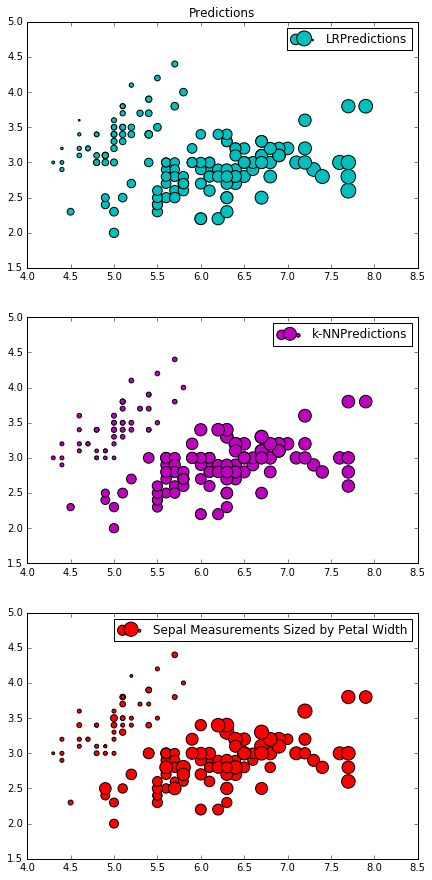

In [101]:
# 散点的大小反映了花瓣宽度预测值（普通线性回归和KNN回归）的大小
f, ax = plt.subplots(nrows=3, figsize=(7,15))
ax[0].set_title("Predictions")
ax[0].scatter(X[:, 0], X[:, 1], s=lr.predict(X)*80, label='LRPredictions', color='c', edgecolors='black')
ax[1].scatter(X[:, 0], X[:, 1], s=knnr.predict(X)*80, label='k-NNPredictions', color='m', edgecolors='black')
ax[2].scatter(X[:, 0], X[:, 1], s=y*80, label='Sepal Measurements Sized by Petal Width', color='r', edgecolors='black')
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [102]:
setosa_idx = np.where(iris.target_names=='setosa')   # 'setosa'鸢尾花的索引
setosa_mask = iris.target == setosa_idx[0]   # 让目标函数为setosa_idx的第1列，即从花的种类变为花瓣宽度
y[setosa_mask][:5]   # y[setosa_mask]是所有'setosa'种类鸢尾花的花瓣宽度

array([ 0.2,  0.2,  0.2,  0.2,  0.2])

In [103]:
knnr.predict(X)[setosa_mask][:5]

array([ 0.28,  0.17,  0.21,  0.2 ,  0.31])

In [104]:
lr.predict(X)[setosa_mask][:5]

array([ 0.44636645,  0.53893889,  0.29846368,  0.27338255,  0.32612885])

#### K-NN回归原理

In [105]:
example_point = X[0]  # 取第一个样本点

In [106]:
# 找出距离该样本点最近的10个样本点
from sklearn.metrics import pairwise
distances_to_example = pairwise.pairwise_distances(X)[0]
ten_closest_points = X[np.argsort(distances_to_example)][:10]

In [107]:
# KNN回归的结果就是对这10个样本点的花瓣宽度取均值
ten_closest_y = y[np.argsort(distances_to_example)][:10]
ten_closest_y.mean()

0.28000000000000003